In [ ]:
import os
import imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy
from amftrack.pipeline.functions.image_processing.node_id import remove_spurs
from amftrack.pipeline.functions.image_processing.extract_skel import remove_component, remove_holes
import numpy as np
from amftrack.pipeline.development.high_mag_videos.high_mag_videos_fun import *
from scipy import signal


/home/ipausers/bisot/miniconda3/envs/amftrack/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2022-10-17 13:52:35,980-[INFO]- numexpr.utils:148 -> Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-10-17 13:52:35,980-[INFO]- numexpr.utils:160 -> NumExpr defaulting to 8 threads.


/home/ipausers/bisot/pycode/MscThesis/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
images_path = r"/mnt/sun/home-folder/Jaap/Transport setup 4 x NileRed/All frames"
images_path = r"/mnt/sun/home-folder/bisot/TRANSPORT/20221013_Plate472/20221013_18"

files = os.listdir(images_path)
images_total_path = [os.path.join(images_path,file) for file in files]
images_total_path.sort()

In [147]:
from PIL import Image
from PIL.ExifTags import TAGS
from datetime import datetime
metadata = [Image.open(path).getexif() for path in selection_file[:10]]
# datetime = [datetime.fromtimestamp(timestamp) for timestamp in timestamps]

In [152]:
for tag_id in metadata[5]:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = metadata[5].get(tag_id)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

ImageWidth               : 1020
ImageLength              : 750
BitsPerSample            : 8
Compression              : 1
PhotometricInterpretation: 1
StripOffsets             : (8, 1028, 2048, 3068, 4088, 5108, 6128, 7148, 8168, 9188, 10208, 11228, 12248, 13268, 14288, 15308, 16328, 17348, 18368, 19388, 20408, 21428, 22448, 23468, 24488, 25508, 26528, 27548, 28568, 29588, 30608, 31628, 32648, 33668, 34688, 35708, 36728, 37748, 38768, 39788, 40808, 41828, 42848, 43868, 44888, 45908, 46928, 47948, 48968, 49988, 51008, 52028, 53048, 54068, 55088, 56108, 57128, 58148, 59168, 60188, 61208, 62228, 63248, 64268, 65288, 66308, 67328, 68348, 69368, 70388, 71408, 72428, 73448, 74468, 75488, 76508, 77528, 78548, 79568, 80588, 81608, 82628, 83648, 84668, 85688, 86708, 87728, 88748, 89768, 90788, 91808, 92828, 93848, 94868, 95888, 96908, 97928, 98948, 99968, 100988, 102008, 103028, 104048, 105068, 106088, 107108, 108128, 109148, 110168, 111188, 112208, 113228, 114248, 115268, 116288, 117308, 118328

In [94]:
timestamps = np.array(timestamps)
np.diff(timestamps)

array([0.0139997 , 0.02305698, 0.04095244, ..., 0.16400027, 1.50300288,
       5.69701123])

(0.0, 0.1)

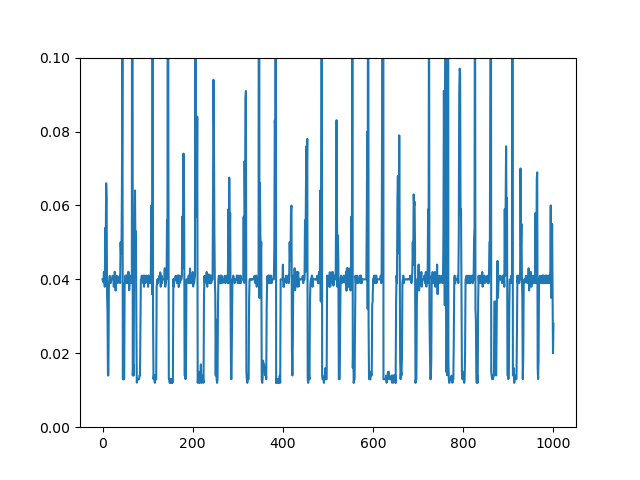

In [100]:
fig, ax = plt.subplots()
ax.plot(np.diff(timestamps))
ax.set_ylim((0,0.1))

In [62]:
index = [i for i in range(len(images_total_path)) if images_total_path[i] in selection_file]

In [137]:
len(selection_file)

1002

In [3]:
def frame_num(file):
    return(int(file.split('_')[-1].split('.')[0]))
def movie_num(file):
    return(file.split('_')[-2])

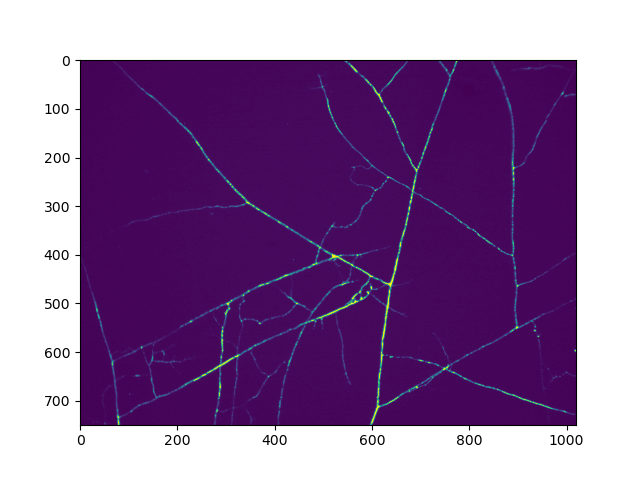

In [103]:
range_interest = range(4900,8000)
selection_file = [file for file in images_total_path if frame_num(file) in range_interest]
selection_file = [file for file in selection_file if movie_num(file)=='150115688']
selection_file.sort()
image = imageio.imread(selection_file[-1])
fig, ax = plt.subplots()
ax.imshow(image)

In [104]:
skeletonized,nx_graph_pruned,pos = segment(selection_file[:100])

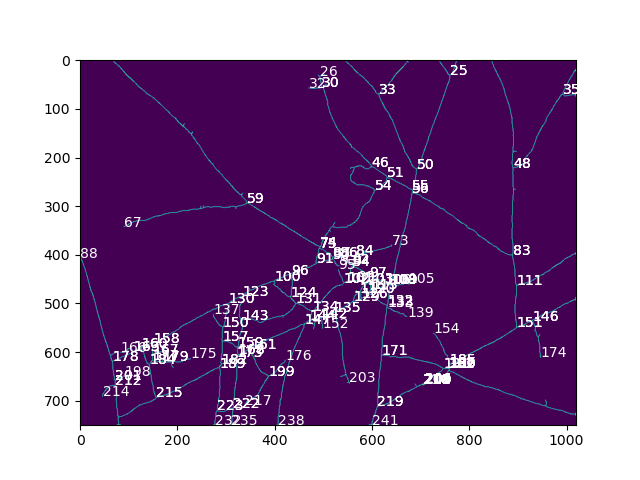

In [109]:
fig, ax = plt.subplots()
ax.imshow(skeletonized)
for edge in list(nx_graph_pruned.edges):
    ax.text(*np.flip(pos[edge[0]]),str(edge[0]),color="white")
    ax.text(*np.flip(pos[edge[1]]),str(edge[1]),color="white")

In [110]:
edges = [(109,56),(50,33),(83,48),(74,59),(241,219),(185,151),(48,35),(48,16),(59,1),(219,171),(171,133),(50,25),(191,171),(223,189),(225,192)]

In [8]:
# edges = [(109,56),(50,33),(83,48),(74,59),(241,219),(185,151),(48,35),(48,16),(59,1)]

In [71]:
edges = [(219,171),(171,133),(109,56),(50,25),(50,33),(74,59),(83,48)]

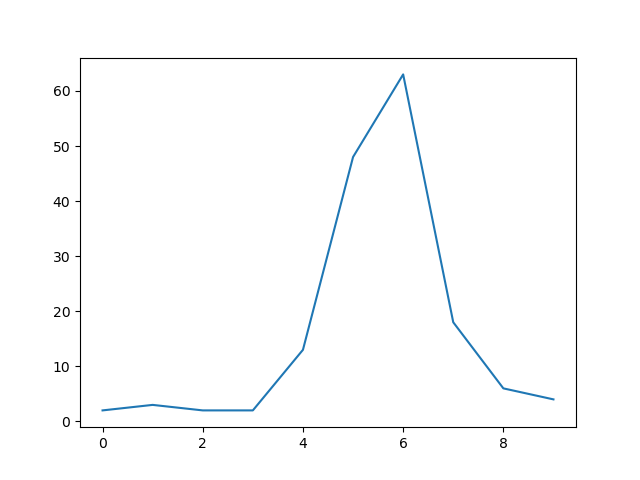

In [155]:
fig, ax = plt.subplots()
ax.plot(slices[0])

In [111]:
slices, segments = extract_section_profiles_for_edge(
    edge,
    pos,
    image,
    nx_graph_pruned,
    resolution=1,
    offset=4,
    step=15,
    target_length=10,
)

Text(0.5, 1.0, 'Slices taken along one hypha')

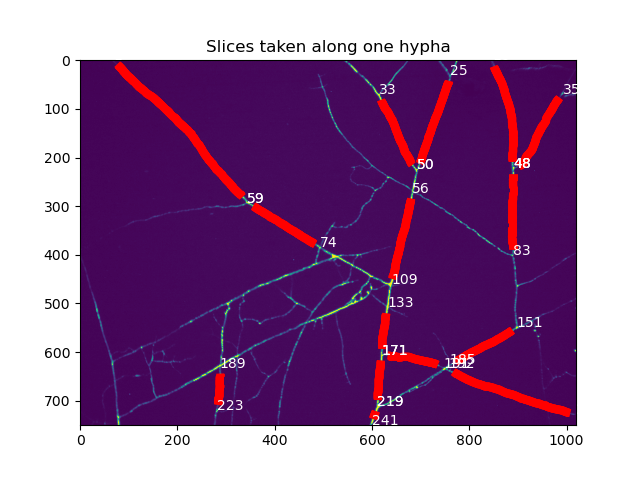

In [126]:
plt.close("all")
fig, ax = plt.subplots()
ax.imshow(image)
for edge in edges:
    slices, segments = extract_section_profiles_for_edge(
    edge,
    pos,
    image,
    nx_graph_pruned,
    resolution=1,
    offset=4,
    step=15,
    target_length=10,
)
    plot_segments_on_image(segments,ax)
    ax.text(*np.flip(pos[edge[0]]),str(edge[0]),color="white")
    ax.text(*np.flip(pos[edge[1]]),str(edge[1]),color="white")
plt.title("Slices taken along one hypha")

In [113]:
kymos = {edge:get_kymo(edge,pos,selection_file,nx_graph_pruned) for edge in edges}

In [114]:
filtered_kymos = {edge: filter_kymo(kymos[edge]) for edge in edges}
speeds = {}

In [115]:
W = 15          # window size is WxW
time_pixel_size = 0.10 #s.pixel
space_pixel_size = 1.725*2 #um.pixel
speeds = {}
for edge in edges:
    imgCoherency, imgOrientation = calcGST(filtered_kymos[edge][1], W)
    speeds[edge]=np.tan((imgOrientation-90)/180*np.pi)*space_pixel_size/time_pixel_size #um.s-1
    speeds[edge]=speeds[edge][:,:300]


In [116]:
corrs = {}
for edge in edges:
    to_treat = (speeds[edge]-np.mean(speeds[edge]))/np.std(speeds[edge])
    corr = signal.correlate2d(to_treat, to_treat)
    corrs[edge]=corr/np.max(corr)

In [117]:
import math
def gridplot(
    n: int,
    ncols = None,
    subw: float = 4.0,
    subh: float = 4.0,
    **kwargs,
):
    if ncols is None:
        ncols = n
    nrows = math.ceil(n / ncols)
    figsize = (subw * ncols, subh * nrows)
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)
    return fig, iter(axs.flatten())

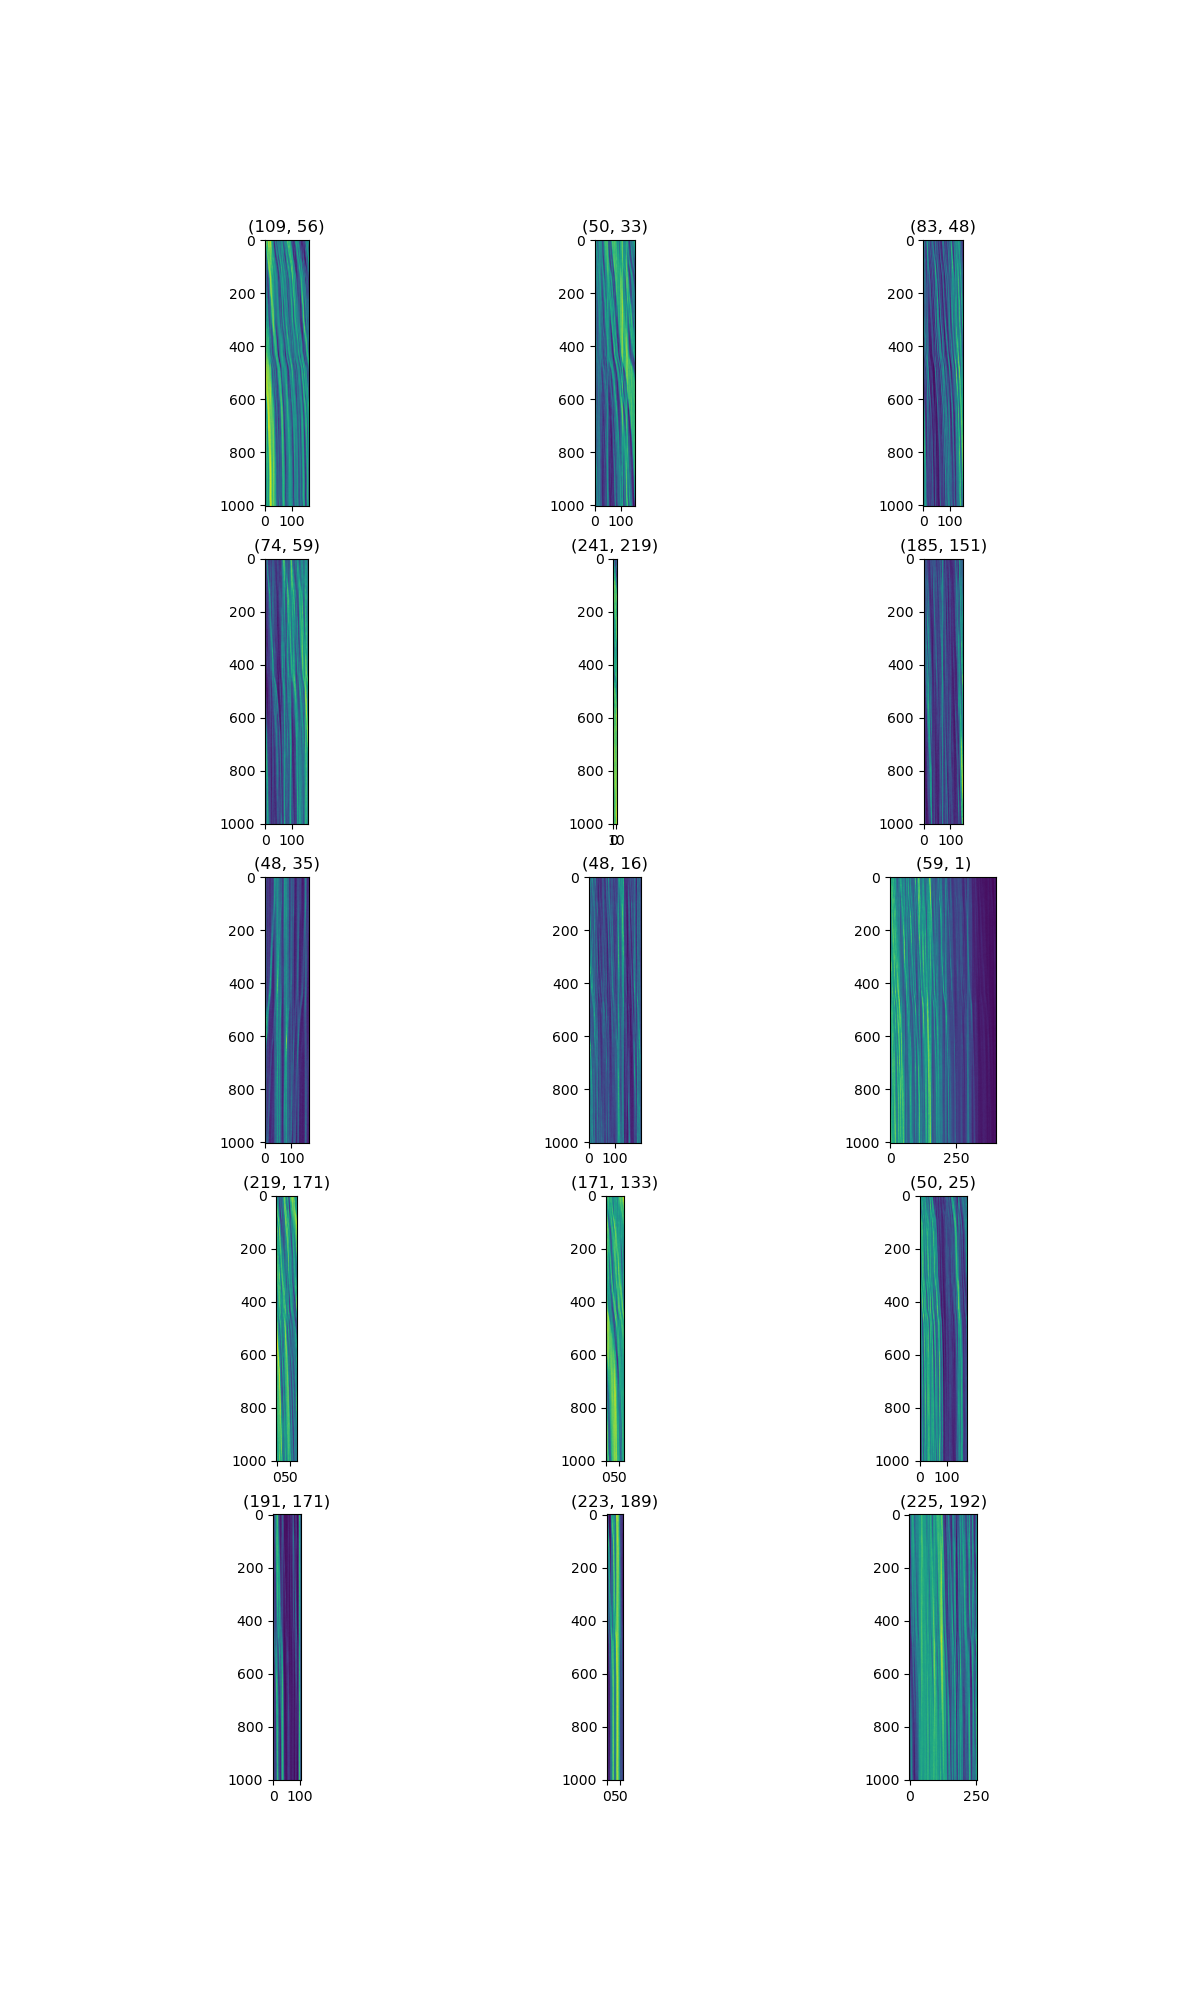

In [138]:
fig,axs = gridplot(len(kymos),ncols = 3)
for i,ax in enumerate(axs):
    ax.imshow(kymos[edges[i]])
    ax.set_title(str(edges[i]))

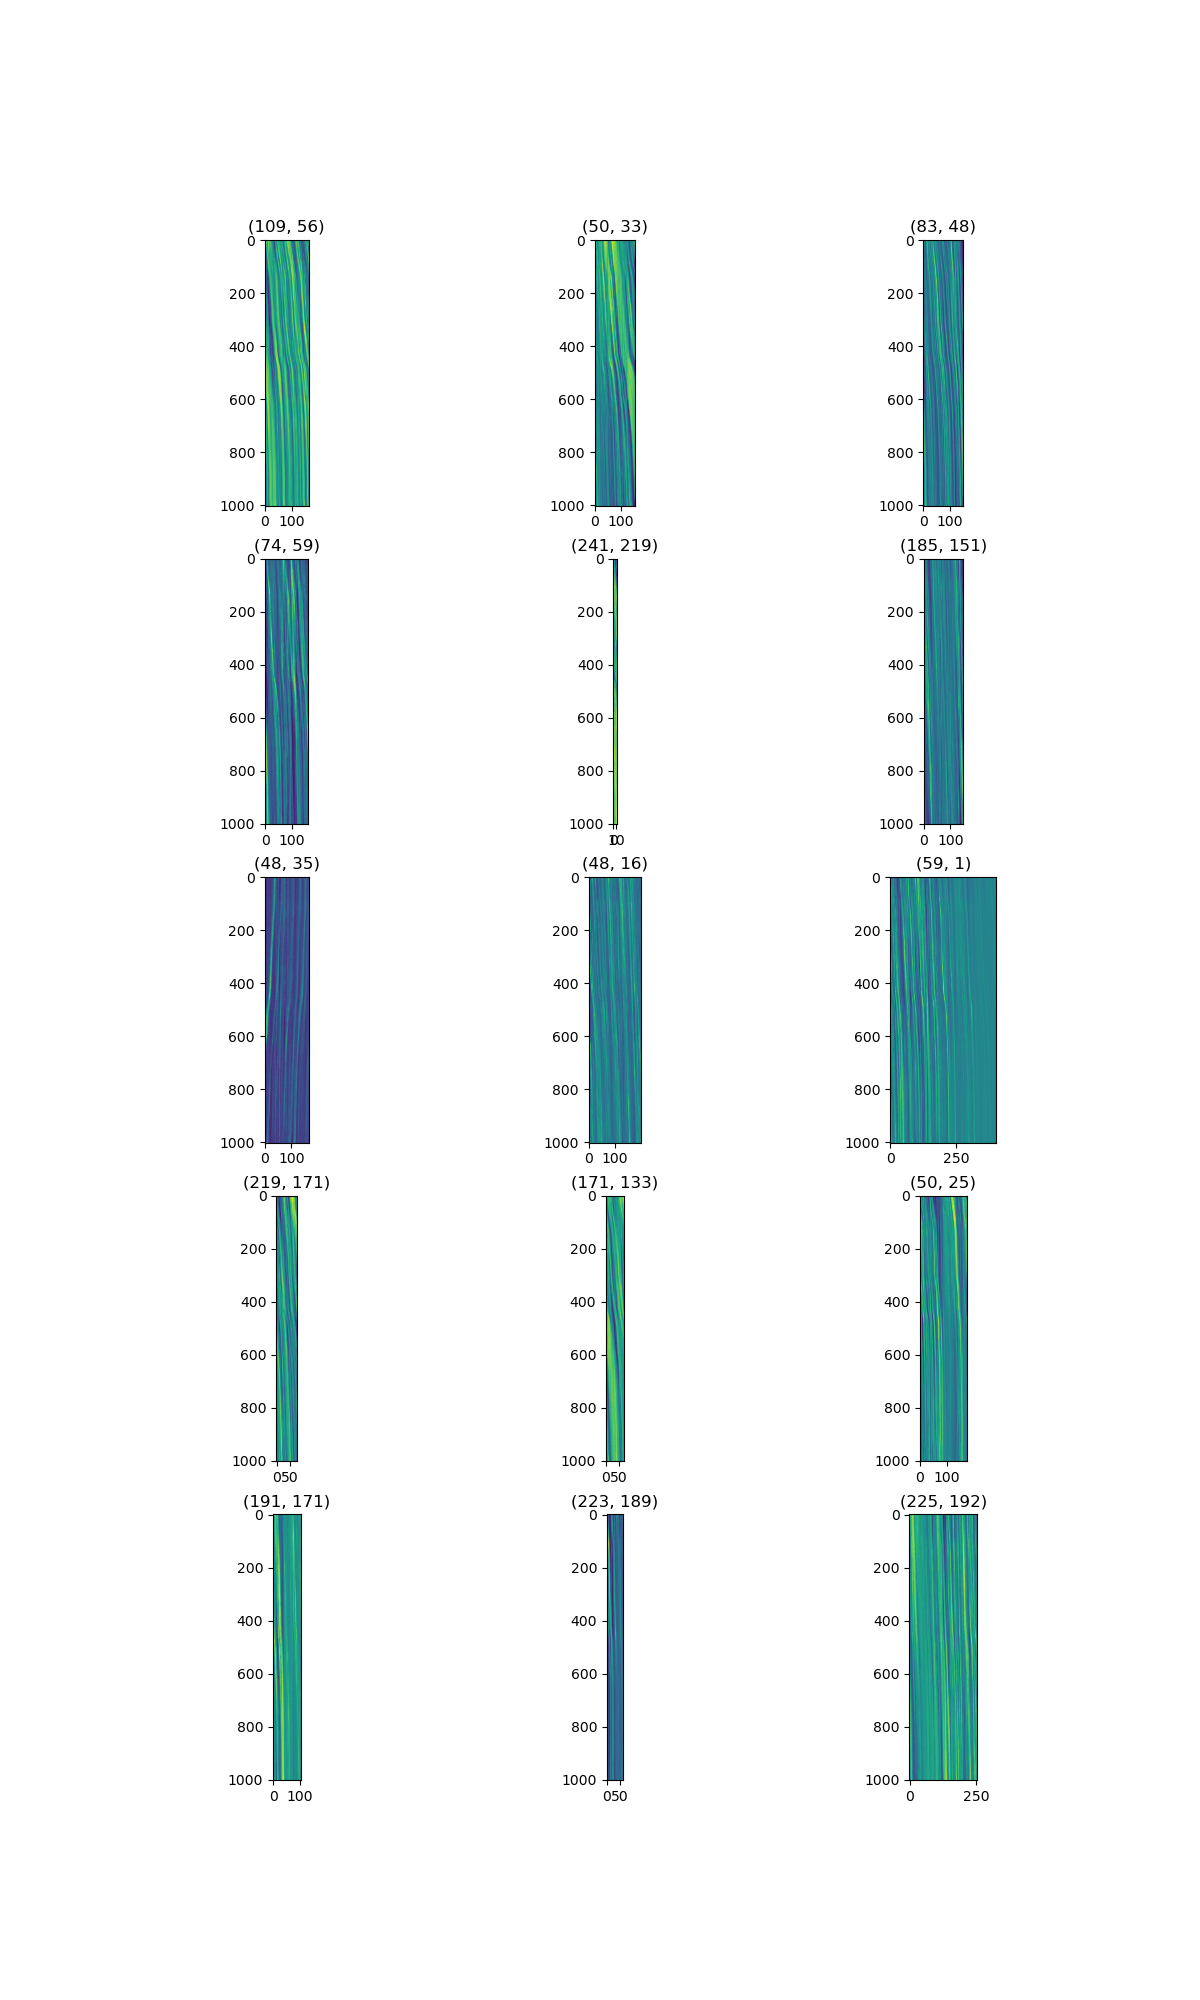

In [119]:
fig,axs = gridplot(len(kymos),ncols = 3)
for i,ax in enumerate(axs):
    ax.imshow(filtered_kymos[edges[i]][1])
    ax.set_title(str(edges[i]))

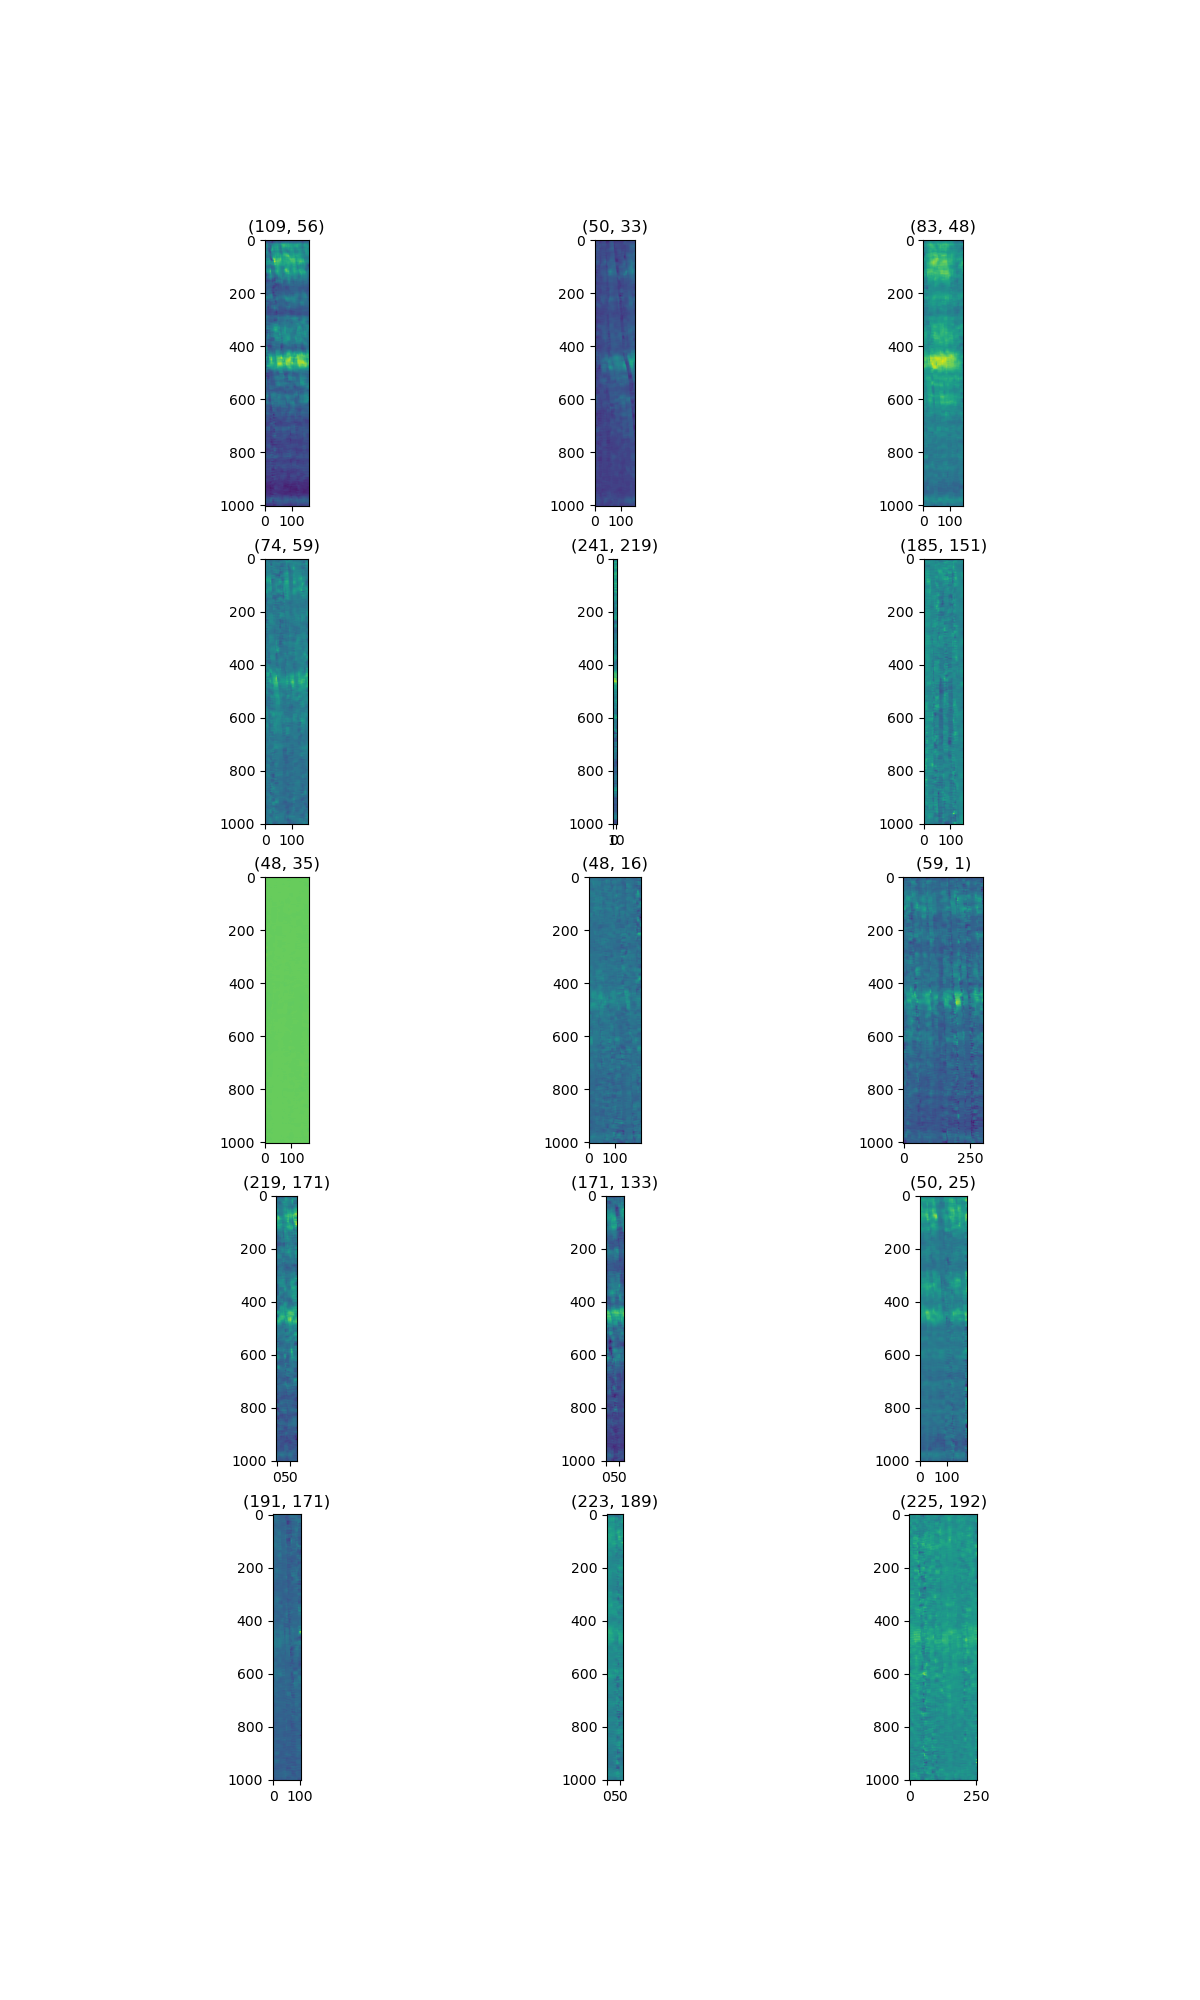

In [120]:
fig,axs = gridplot(len(kymos),ncols = 3)
for i,ax in enumerate(axs):
    ax.imshow(speeds[edges[i]])
    ax.set_title(str(edges[i]))

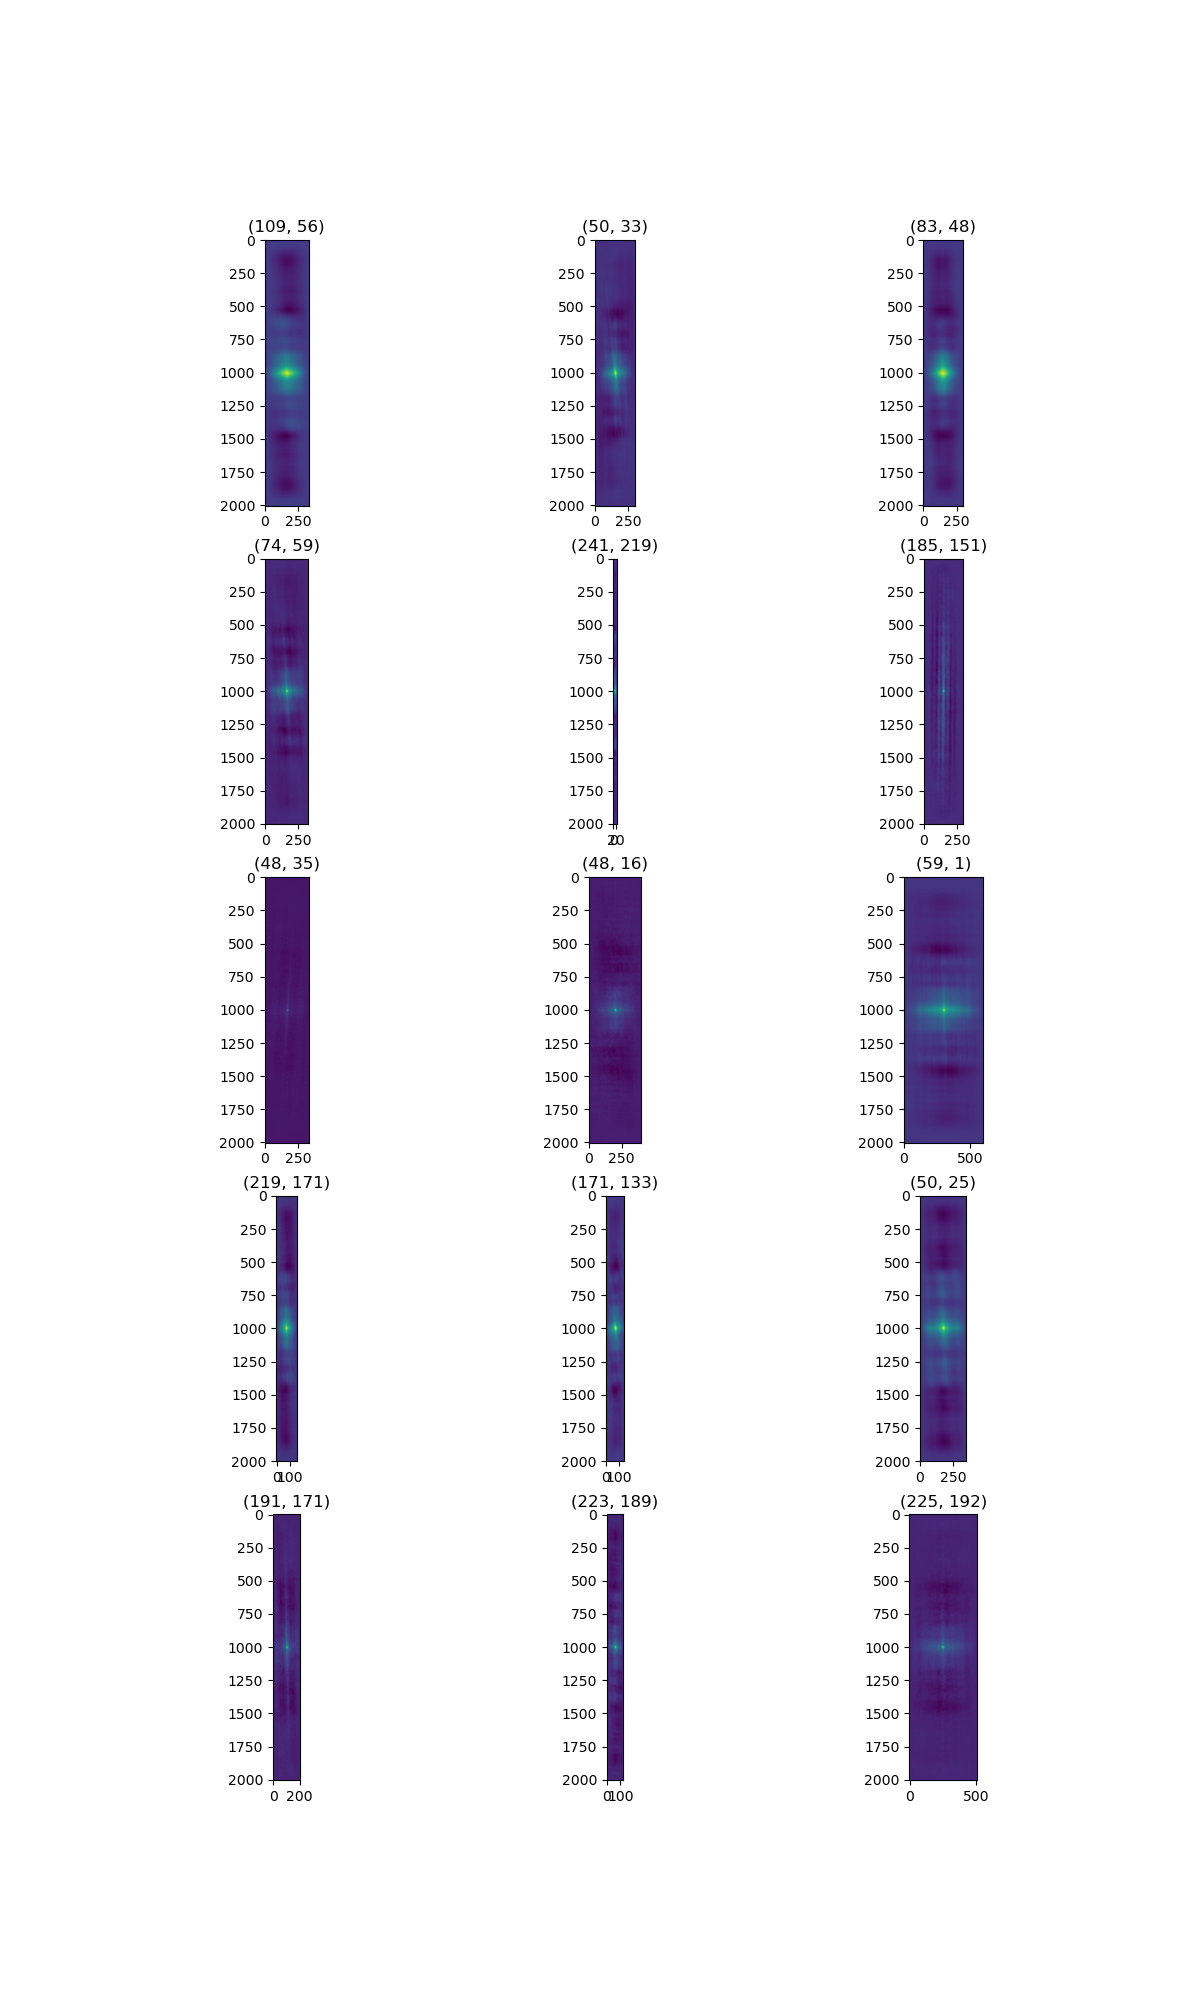

In [121]:
fig,axs = gridplot(len(kymos),ncols = 3)
for i,ax in enumerate(axs):
    ax.imshow(corrs[edges[i]])
    ax.set_title(str(edges[i]))

In [20]:
edge = (109,56)
# corr = signal.correlate2d(speeds[edge], speeds[edge],mode='same')

Text(0.5, 1.0, '(109, 56)')

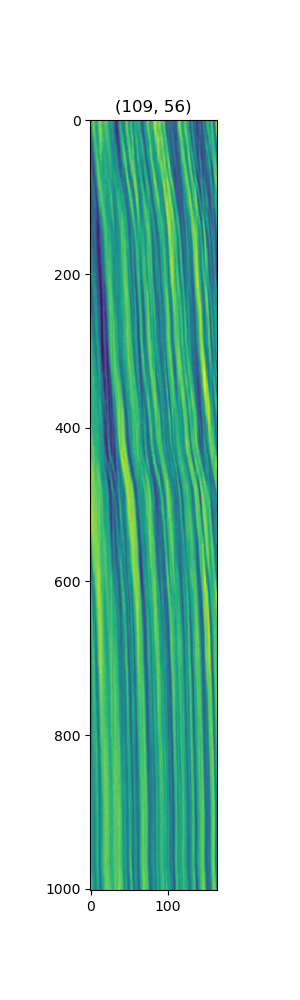

In [21]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(filtered_kymos[edge][1])
ax.set_title(str(edge))

In [22]:
speeds[edge]=speeds[edge][:,:300]
to_treat = (speeds[edge]-np.mean(speeds[edge]))/np.std(speeds[edge])
# corr = signal.correlate2d(to_treat, to_treat,mode='same')
# corr = corr/np.max(corr)

Text(0, 0.5, 'time')

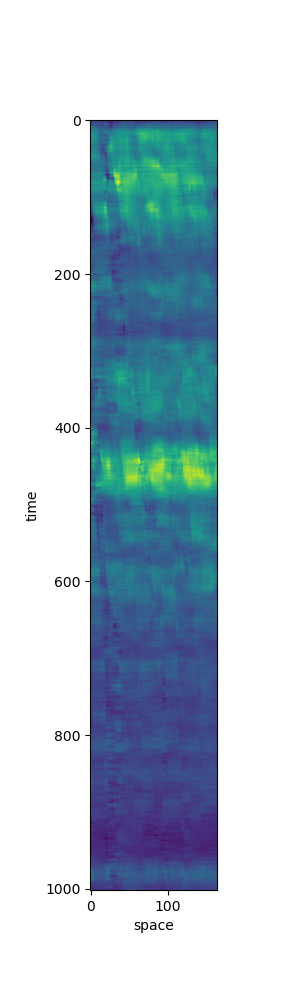

In [23]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(speeds[edge])
ax.set_xlabel('space')
ax.set_ylabel('time')

Text(0, 0.5, 'time')

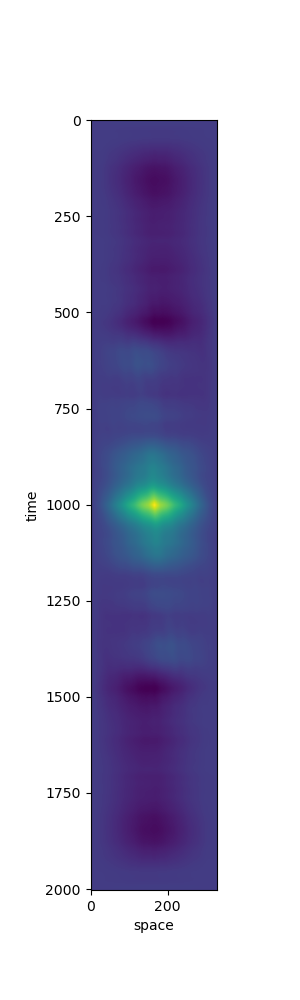

In [24]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(corrs[edge])
ax.set_xlabel('space')
ax.set_ylabel('time')

In [25]:
corr = corrs[edge]

In [26]:
length_edge = get_length_um_edge(edge,nx_graph_pruned,space_pixel_size)

Text(0, 0.5, 'correlation')

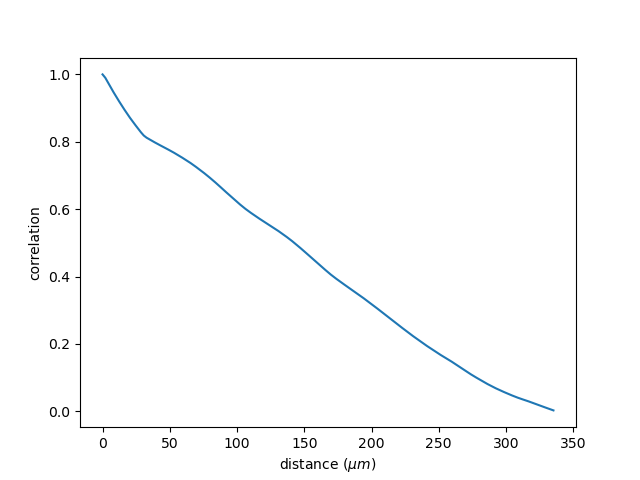

In [27]:
spatial_corr = corr[corr.shape[0]//2,corr.shape[1]//2:]
fig, ax = plt.subplots()
length_space= length_edge
xs = np.linspace(0,length_space/2,len(spatial_corr))
ax.plot(xs,spatial_corr)
ax.set_xlabel('distance ($\mu m$)')
ax.set_ylabel('correlation')

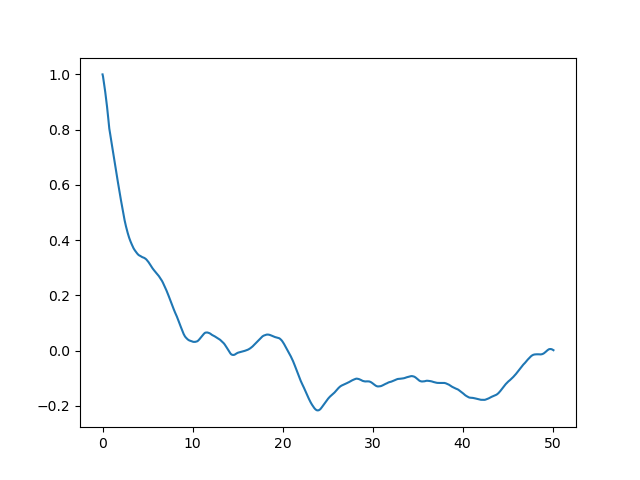

In [28]:
time_corr = corr[corr.shape[0]//2:,corr.shape[1]//2]
fig, ax = plt.subplots()
length_time= time_pixel_size*len(time_corr)
ts = np.linspace(0,length_time/2,len(time_corr))
ax.plot(ts,time_corr)

Text(0, 0.5, 'time_shift with the peak of correlation (s)')

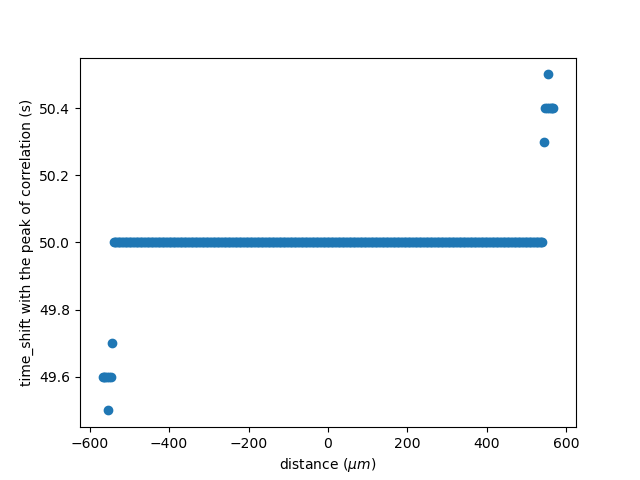

In [29]:
space_pixel_size = 1.725*2
fig, ax = plt.subplots()
max_time_corr = np.argmax(corr,axis=0)*time_pixel_size-length_time/2
length_space= space_pixel_size*len(max_time_corr)
xs = np.linspace(-length_space/2,length_space/2,len(max_time_corr))
plt.scatter(xs,max_time_corr)
# ax.set_ylim(-10,10)
ax.set_xlabel('distance ($\mu m)$')
ax.set_ylabel('time_shift with the peak of correlation (s)')

Text(0, 0.5, 'distance shift with the peak of correlation ($\\mu m$)')

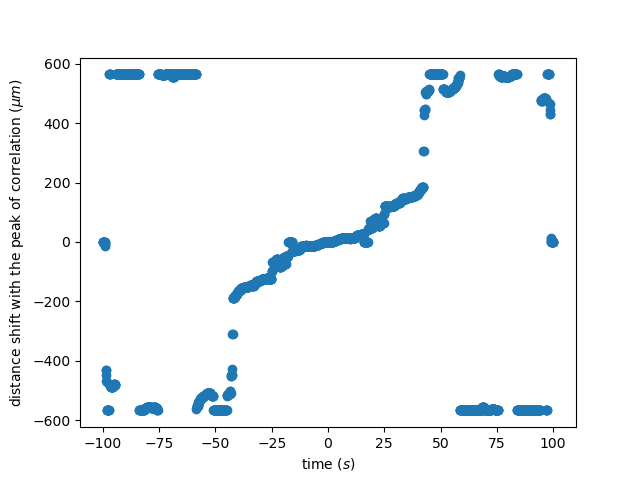

In [30]:
time_pixel_size = 0.1
fig, ax = plt.subplots()
max_space_corr = np.argmax(corr,axis=1)*space_pixel_size-length_space/2
length_time= time_pixel_size*len(max_space_corr)
ts = np.linspace(-length_time/2,length_time/2,len(max_space_corr))
plt.scatter(ts,max_space_corr)
ax.set_xlabel('time ($s)$')
ax.set_ylabel('distance shift with the peak of correlation ($\mu m$)')

In [31]:
np.mean(speeds[edge],axis=1)

array([0.6356058 , 0.69891614, 0.76280636, ..., 0.49860886, 0.42845714,
       0.4277799 ], dtype=float32)

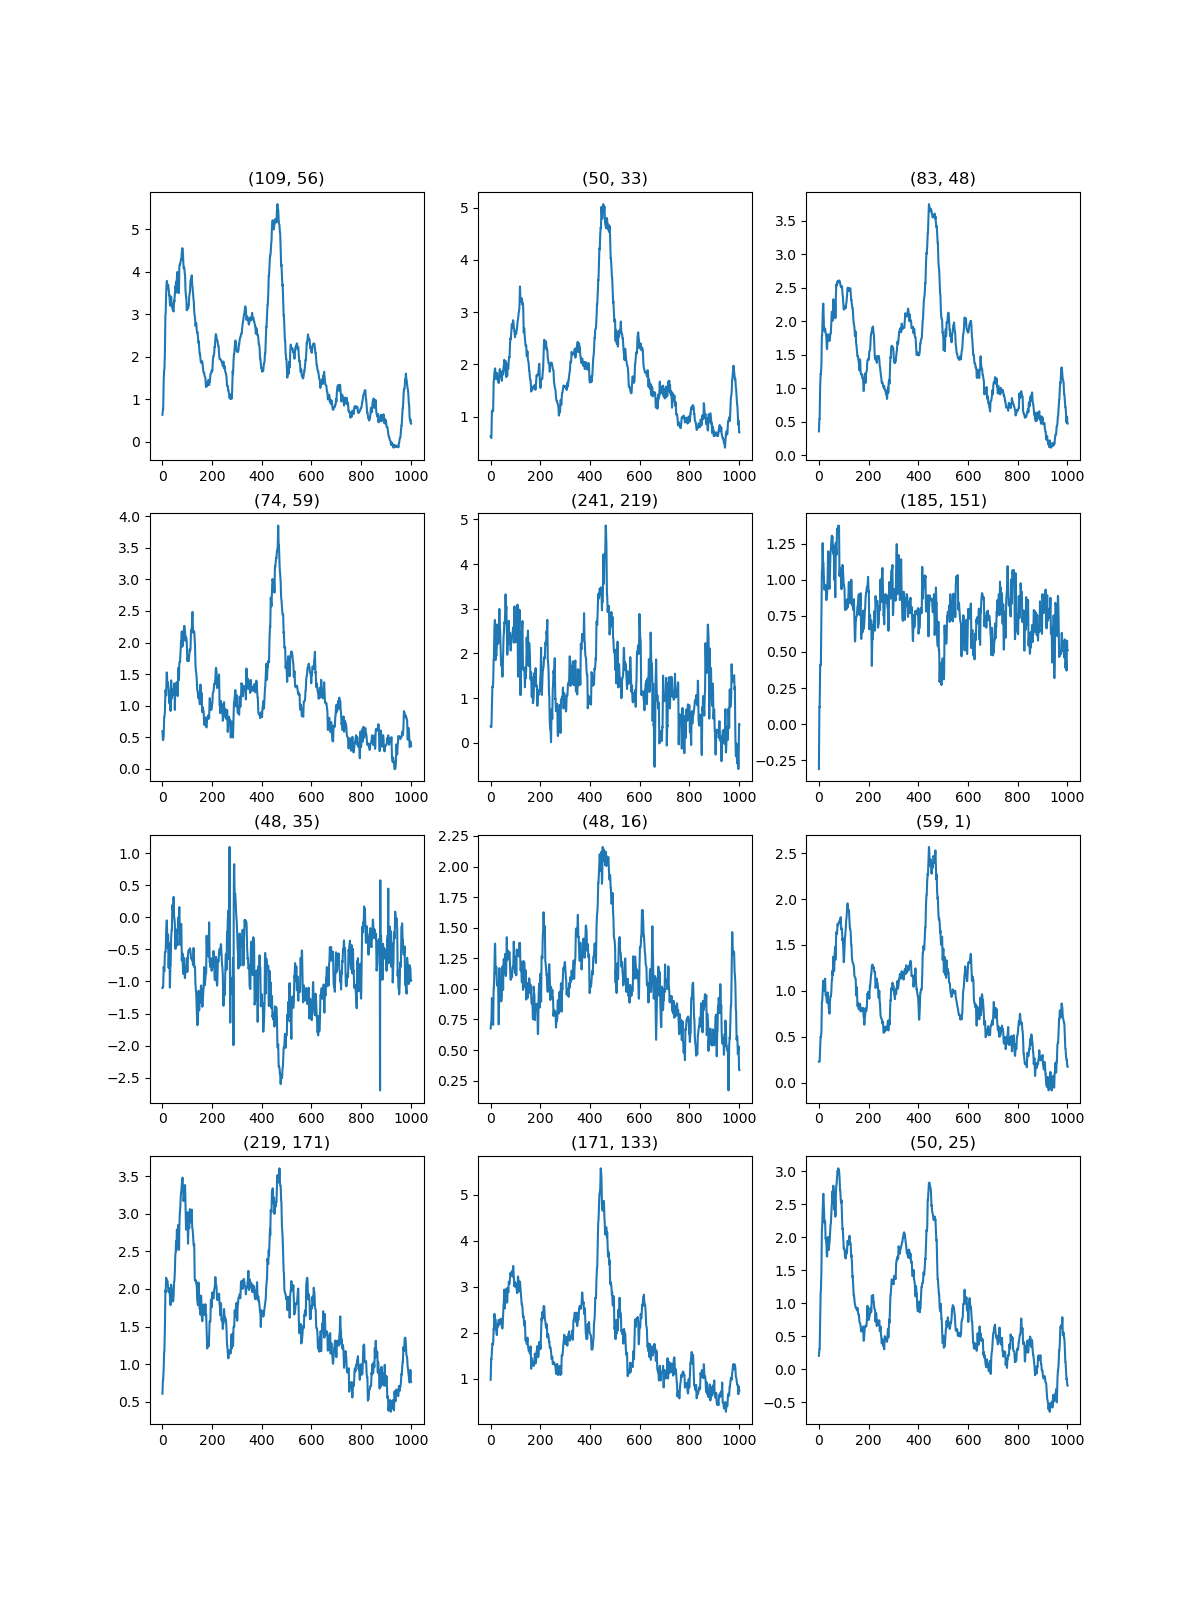

In [32]:
mean_speed = {edge:np.mean(speeds[edge],axis=1) for edge in edges}
fig,axs = gridplot(len(kymos),ncols = 3)
for i,ax in enumerate(axs):
    ax.plot(mean_speed[edges[i]])
    ax.set_title(str(edges[i]))
    # ax.set_ylim((0,-8.5))

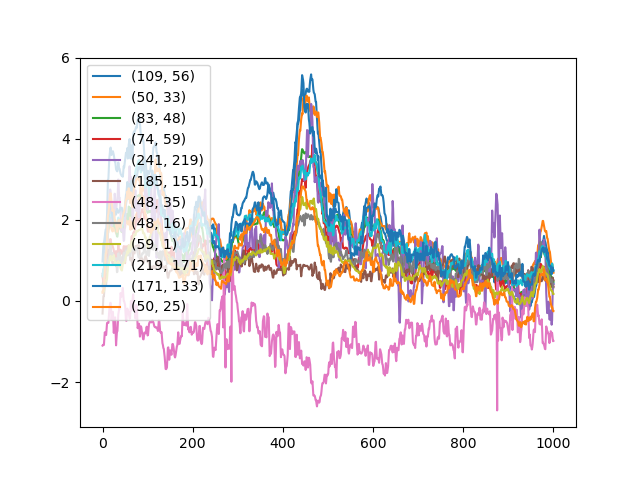

In [36]:
fig,ax = plt.subplots()
for edge in edges:
    ax.plot(mean_speed[edge],label=edge)
# ax.set_ylim(0,-10)
plt.legend()

In [129]:
cross_corrs={}
signal_compare = (mean_speed[(219,171)]-np.mean(mean_speed[(219,171)]))/(np.std(mean_speed[(219,171)]))
for edge in edges:
    signal_2 = (mean_speed[edge]-np.mean(mean_speed[edge]))/(np.std(mean_speed[edge]))

    cross_corrs[edge] = signal.correlate(signal_2,signal_compare)

In [48]:
cross_corrs[edge]

array([3313.1567], dtype=float32)

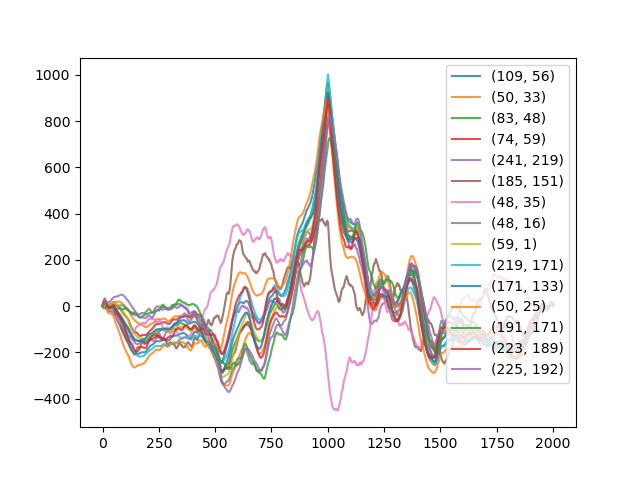

In [145]:
fig,ax = plt.subplots()
for edge in edges:
    time_corr = cross_corrs[edge]
    ts = np.linspace(0,length_time/2,len(time_corr))
    length_time= time_pixel_size*len(time_corr)
    ax.plot(time_corr,label=edge,alpha=0.8)


plt.legend()

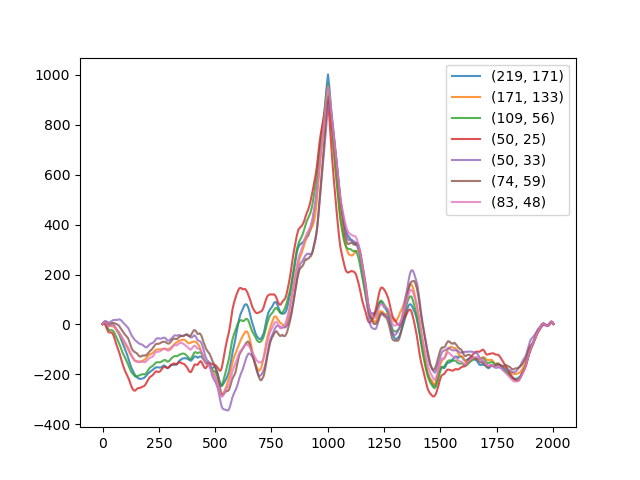

In [144]:
fig,ax = plt.subplots()
for edge in [(219,171),(171,133),(109,56),(50,25),(50,33),(74,59),(83,48)]:
    time_corr = cross_corrs[edge]
    ts = np.linspace(0,length_time/2,len(time_corr))
    length_time= time_pixel_size*len(time_corr)
    ax.plot(time_corr,label=edge,alpha=0.8)


plt.legend()

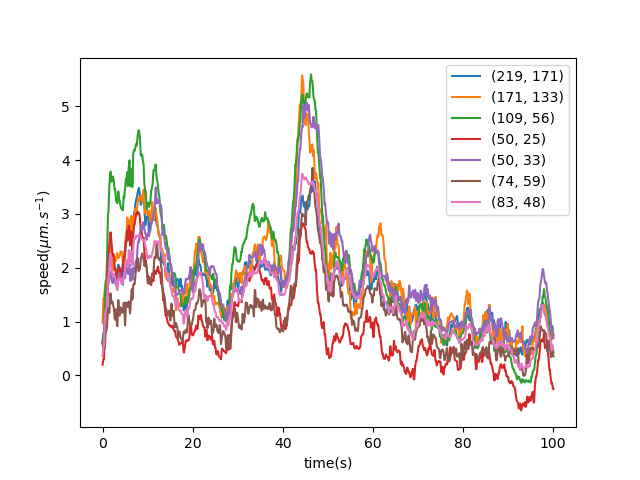

In [139]:

fig,ax = plt.subplots()
for edge in [(219,171),(171,133),(109,56),(50,25),(50,33),(74,59),(83,48)]:
    ax.plot(np.array(range(len(mean_speed[edge])))*time_pixel_size,mean_speed[edge],label=edge)
ax.set_xlabel('time(s)')
ax.set_ylabel('speed($\mu m.s^{-1}$)')
plt.legend()

Text(0, 0.5, 'speed($\\mu m.s^{-1}$)')

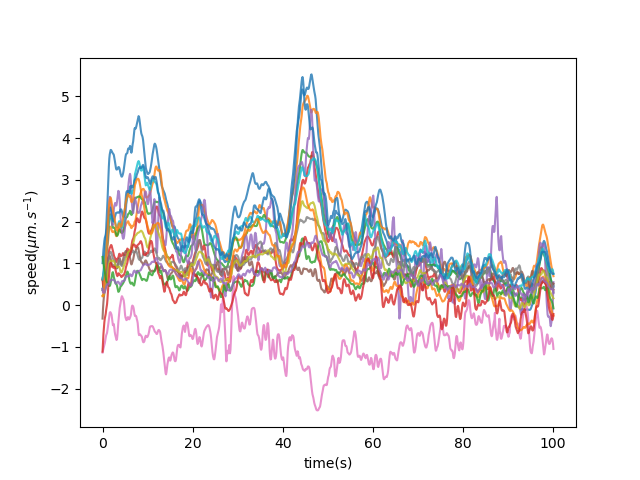

In [154]:
mean_speed = {edge:np.mean(speeds[edge],axis=1) for edge in edges}
mean_speed_smooth = {edge:scipy.signal.savgol_filter(np.mean(speeds[edge],axis=1),11,3) for edge in edges}

fig,ax = plt.subplots()
for edge in edges:
    ax.plot(np.array(range(len(mean_speed[edge])))*time_pixel_size,mean_speed_smooth[edge],label=edge,alpha=0.8)
ax.set_xlabel('time(s)')
ax.set_ylabel('speed($\mu m.s^{-1}$)')
# plt.legend()

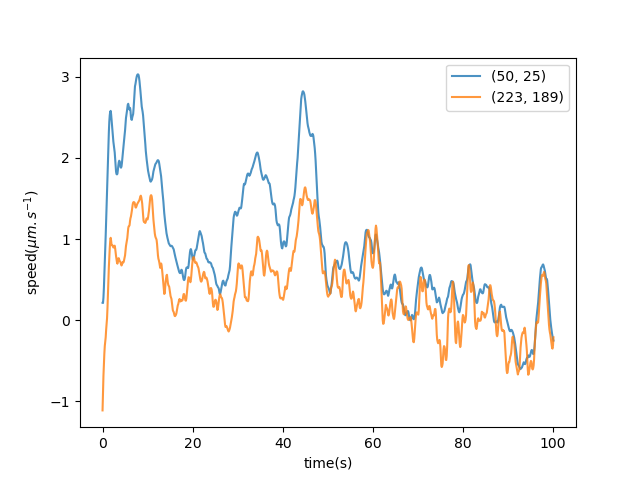

In [142]:
mean_speed = {edge:np.mean(speeds[edge],axis=1) for edge in edges}
mean_speed_smooth = {edge:scipy.signal.savgol_filter(np.mean(speeds[edge],axis=1),11,3) for edge in edges}

fig,ax = plt.subplots()
for edge in [(50,25),(223,189)]:
    ax.plot(np.array(range(len(mean_speed[edge])))*time_pixel_size,mean_speed_smooth[edge],label=edge,alpha=0.8)
ax.set_xlabel('time(s)')
ax.set_ylabel('speed($\mu m.s^{-1}$)')
plt.legend()

In [ ]:
for edge in [(219,171),(171,133),(109,56),(50,25),(50,33),(74,59),(83,48)]:
    print(edgemean_speed[edge],label=edge)

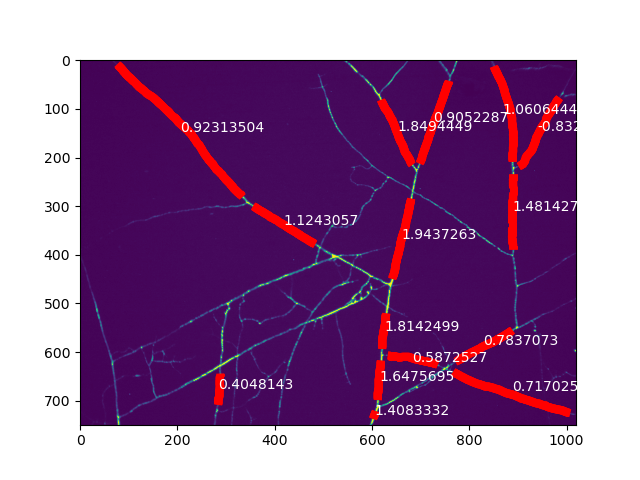

In [128]:
fig, ax = plt.subplots()
ax.imshow(image)
for edge in edges:
    slices, segments = extract_section_profiles_for_edge(
    edge,
    pos,
    image,
    nx_graph_pruned,
    resolution=1,
    offset=4,
    step=15,
    target_length=10,
)
    plot_segments_on_image(segments,ax)
    ax.text(*np.flip(np.mean([pos[edge[0]],pos[edge[1]]],axis=0)),np.mean(mean_speed[edge]),color="white")

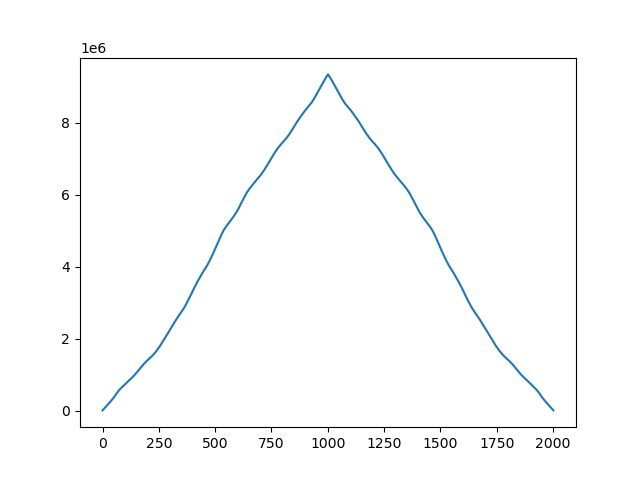

In [157]:
i=0
fig, ax = plt.subplots()
signal = 
ax.plot(signal.correlate(kymos[edges[i]][:,0],kymos[edges[i]][:,0]))
# ax.plot(signal.correlate(kymos[edges[i]][0,:],kymos[edges[i]][100,:]))
# ax.plot(signal.correlate(kymos[edges[i]][0,:],kymos[edges[i]][200,:]))